## Appendix B4. K Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

save_figures = False
figure_path = "../figures/models/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")

In [2]:
df_tt_train.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.474255,-1.160118,0.858181,1
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.474255,0.589356,-0.999109,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.794531,0.589356,0.858181,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.474255,-1.160118,0.858181,0


In [3]:
X_tt_train = df_tt_train.iloc[:,0:-1].to_numpy()
y_tt_train = df_tt_train["y"].to_numpy()

X_tt_test = df_tt_test.iloc[:,0:-1].to_numpy()
y_tt_test = df_tt_test["y"].to_numpy()

X_tt_train = np.ascontiguousarray(X_tt_train)
y_tt_train = np.ascontiguousarray(y_tt_train)
X_tt_test = np.ascontiguousarray(X_tt_test)
y_tt_test = np.ascontiguousarray(y_tt_test)

### KNN, Default Parameter

In [4]:
%%time

KNN_default = KNeighborsClassifier(n_jobs = -2)
KNN_default.fit(X_tt_train, y_tt_train)

Wall time: 997 µs


KNeighborsClassifier(n_jobs=-2)

In [5]:
KNN_default.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -2,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
y_pred_default = KNN_default.predict(X_tt_test)

In [7]:
print(balanced_accuracy_score(y_tt_test, y_pred_default))
print(accuracy_score(y_tt_test, y_pred_default))

0.5603090507726269
0.7692307692307693


### KNN, Grid Search

In [8]:
random_state = 132
KNN_grid = KNeighborsClassifier(n_jobs = -2)
KNN_grid

KNeighborsClassifier(n_jobs=-2)

In [9]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 10, 30], 
              'weights': ['uniform', 'distance']}

gridCV_knn = GridSearchCV(estimator = KNN_grid, 
                          param_grid = params_KNN, 
                          scoring = 'balanced_accuracy', 
                          n_jobs = -2,
                          refit = True, 
                          cv = 5, verbose = 4)
gridCV_knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-2), n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 30],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=4)

In [10]:
%%time 
gridCV_knn.fit(X_tt_train, y_tt_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Wall time: 2.85 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-2), n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 30],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=4)

In [11]:
y_pred_knn = gridCV_knn.predict(X_tt_test)
gridCV_knn.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [12]:
print(balanced_accuracy_score(y_tt_test, y_pred_knn))
print(accuracy_score(y_tt_test, y_pred_knn))

0.6039293598233996
0.7347480106100795


In [14]:
import json

knn_params = {"rfc": gridCV_knn.best_params_}

with open("../results/knn_params.json", "w") as outfile:
    json.dump(knn_params, outfile)
    
# with open("logistic.json", "r") as readfile:
#     dict_data = json.load(readfile)

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_confusin_matrix(y_test, y_pred, model_name):
    c_labels = [0, 1] 
    c_disp_labels = ["Not Green", "Green"]

    c_matrix = confusion_matrix(y_test, y_pred,
                                labels = c_labels)
    c_mat_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                           display_labels = c_disp_labels)

    fig_con, ax_con = plt.subplots()

    c_mat_display.plot(ax = ax_con, cmap = "PuBu")
    ax_con.set_xlabel(ax_con.get_xlabel(), fontsize = 16)
    ax_con.set_ylabel(ax_con.get_ylabel(), fontsize = 16)
    ax_con.set_title(model_name, fontsize = 18)

    text_artists = ax_con.get_children()[0:4]
    for each_text in text_artists:
        each_text.set_fontsize(14)

    ax_con.set_xticks(ax_con.get_xticks())
    ax_con.set_xticklabels(c_disp_labels, fontsize = 14)

    ax_con.set_yticks(ax_con.get_xticks())
    ax_con.set_yticklabels(c_disp_labels, fontsize = 14)

    fig_con.set_size_inches([8, 6])
    
    return fig_con, ax_con


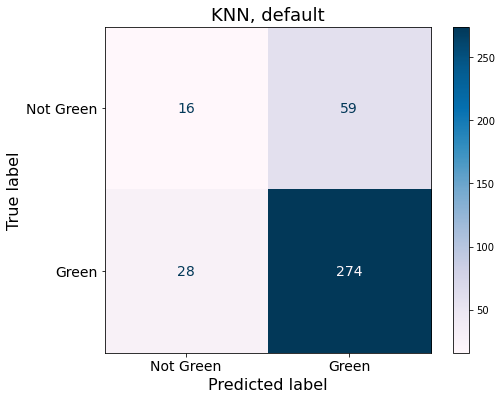

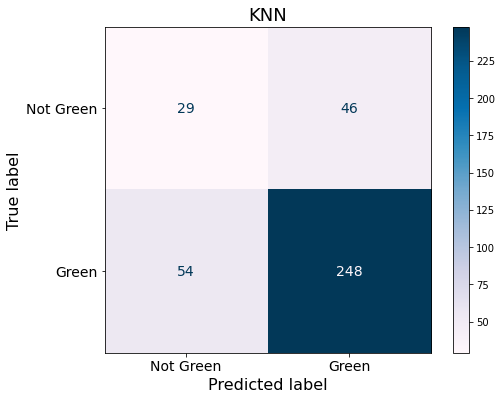

In [16]:
fig_con_de, ax_con_de = custom_confusin_matrix(y_tt_test, y_pred_default, "KNN, default")
fig_con_knn, ax_con_knn = custom_confusin_matrix(y_tt_test, y_pred_knn, "KNN")

cm_figs = [fig_con_de, fig_con_knn]
fig_file_names = ["CM KNN, default", "CM KNN"]

# save_figures
if save_figures:
    for each_f, each_n in zip(cm_figs, fig_file_names):
        fig_name = f"{figure_path}{each_n}"
        each_f.savefig(f"{fig_name}.pdf", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.png", 
                       dpi = 300, 
                       bbox_inches="tight")
        each_f.savefig(f"{fig_name}.svg", 
                       dpi = 300, 
                        bbox_inches="tight")